# Научно-исследовательский семинар "Анализ данных в Python"

# Тема 5: Кластерный анализ

* [1. Иерархический кластерный анализ](#chapter1)
    * [Пример 1.1. Производство пива](#section_1_1)
    * [Пример 1.2. Оценка кандидатов](#section_1_2)
* [2. Кластерный анализ методом k-means](#chapter2)
    * [Пример 2.1. Synthetic data](#section_2_1)
    * [Пример 2.2. YouTube](#section_2_2)
* [3. DBSCAN](#chapter3)
    * [Пример 3.1. Synthetic data](#section_3_1)
    * [Пример 3.2. Mall Customer Segmentation Data](#section_3_2)

In [58]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

## 1. Иерархический кластерный анализ <a class="anchor" id="chapter1"></a>

### Пример 1.1. Производство пива <a id="section_1_1"></a>

Описание переменных:
- bier  - Name of the brand
- producer - Name of the producer 
- costs - Spending in dollars for capacity equal to 12 ounces
- calories - calories for the same amount of beer
- alcohol - alcohol content in percent

In [60]:
df1 = pd.read_excel('beer.xlsx')
df1

,bier,producer,costs,calories,alcohol
0,Budweiser,USA,0.43,144,4.7
1,Lowenbrau,USA,0.48,157,4.9
2,Michelob,USA,0.50,162,5.0
3,Kronenbourg,France,0.73,170,5.2
4,Heineken,Holland,0.77,152,5.0
5,Schmidts,USA,0.30,147,4.7
6,Pabst Blue Ribbon,USA,0.38,152,4.9
7,Miller Light,USA,0.43,99,4.3
8,Budweiser Light,USA,0.44,113,3.7
9,Coors Light,USA,0.46,102,4.1


## Предварительный графический анализ данных

<Axes: xlabel='calories', ylabel='costs'>

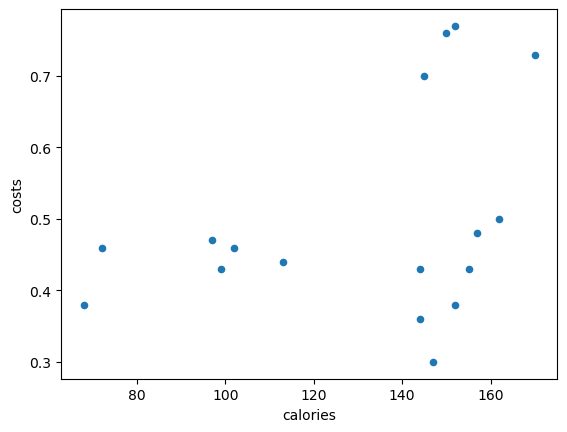

In [61]:
df1.plot('calories', 'costs', kind='scatter')  # диаграмма рассеяния

<Axes: xlabel='z_calories', ylabel='z_costs'>

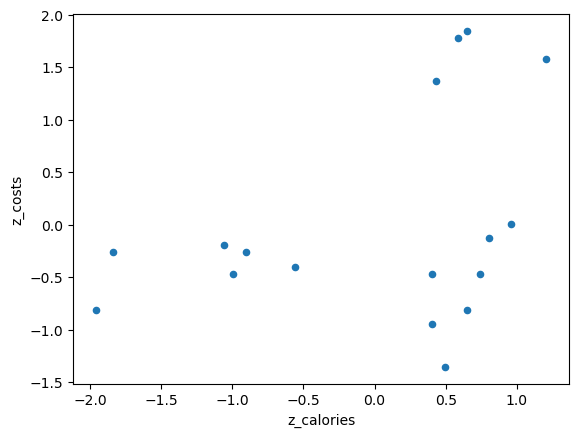

In [62]:
df1['z_calories'] = (df1['calories'] - df1['calories'].mean())/df1['calories'].std()
df1['z_costs'] = (df1['costs'] - df1['costs'].mean())/df1['costs'].std()
df1.plot('z_calories', 'z_costs', kind='scatter')
# стандартизируем значения переменных, поскольку они измерены в разных шкалах

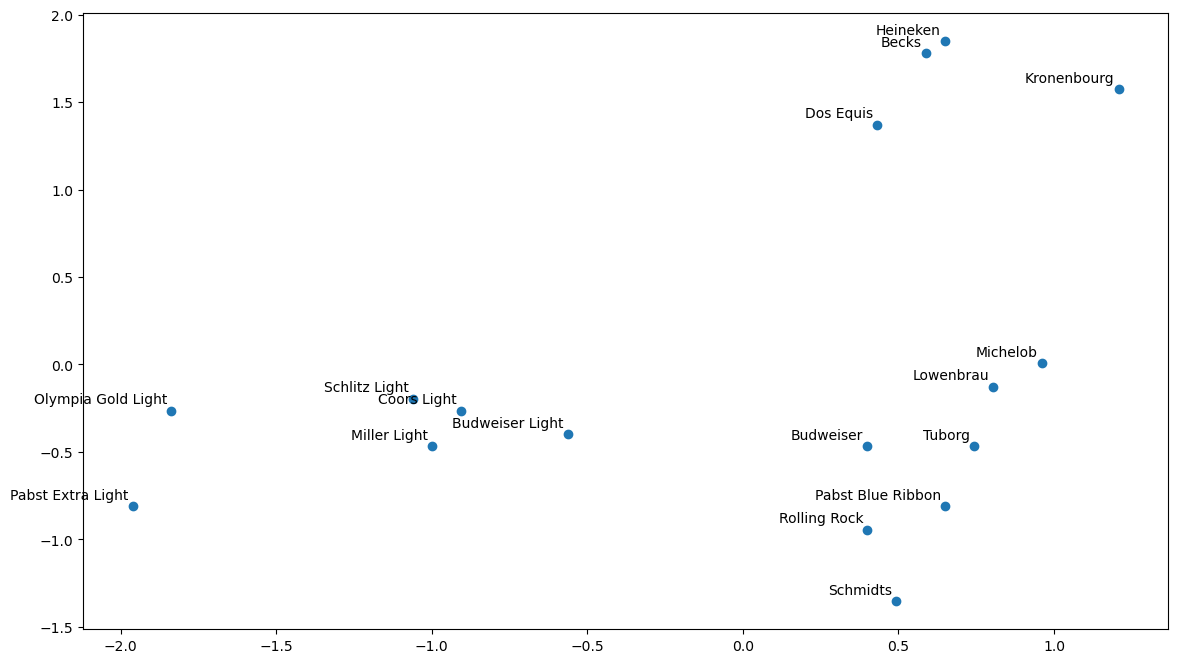

In [63]:
labels = df1['bier']
plt.figure(figsize=(14, 8))
plt.scatter(df1['z_calories'],df1['z_costs'], label='True Position')

for label, x, y in zip(labels, df1['z_calories'], df1['z_costs']):  # добавляем метки с названиями брендов
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Подробнее про linkage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Подробнее про fckuster: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

Подробнее про dendrogram: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

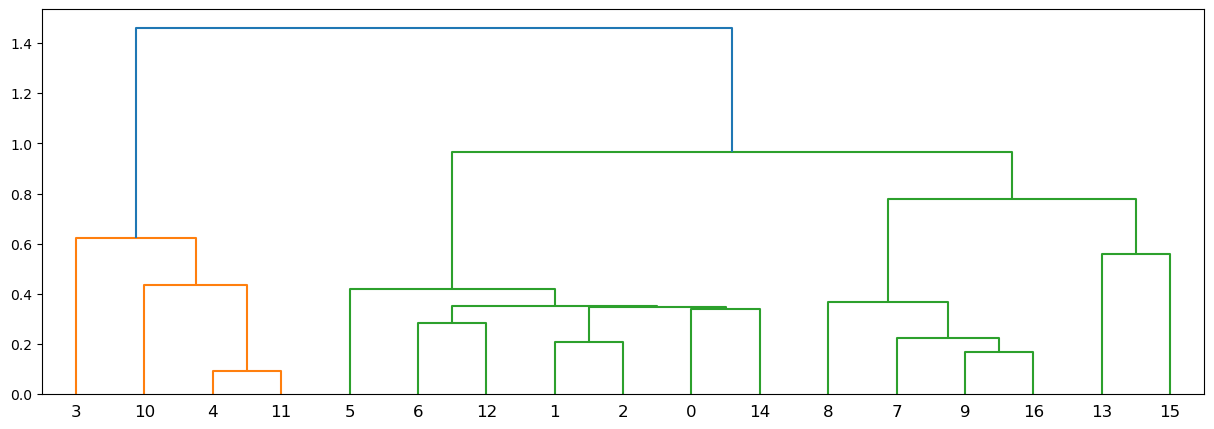

In [65]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'single'))
# Близлежащий сосед / Nearest neighbor / Single-linkage

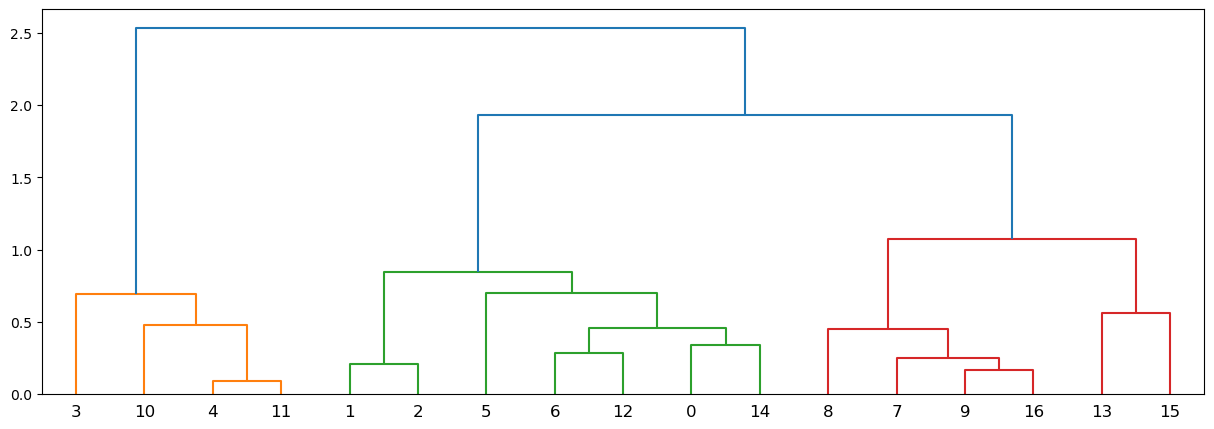

In [66]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'average'))
# Межгрупповые связи / Average Linkage / Between Groups Linkage

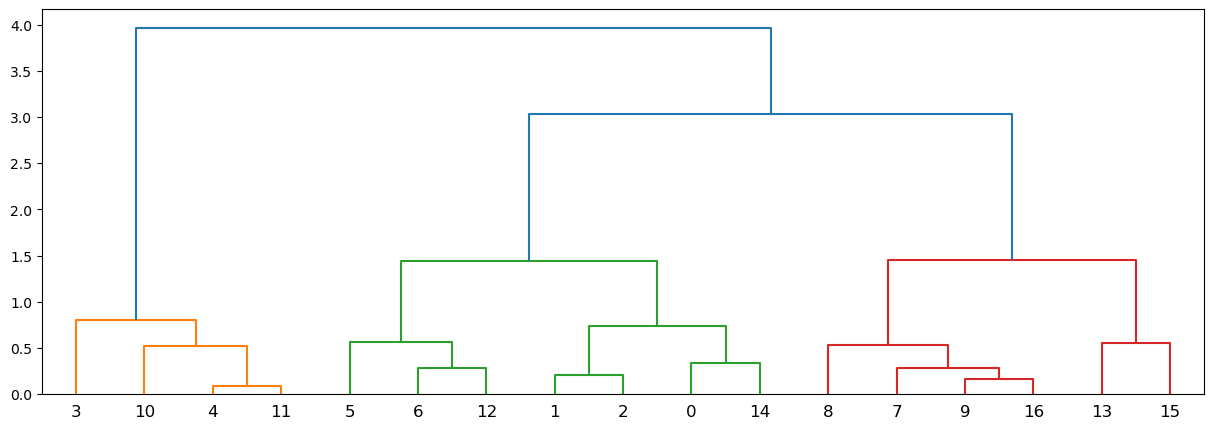

In [67]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'complete'))
# Дальний сосед / Furthest neighbor / Complete-linkage

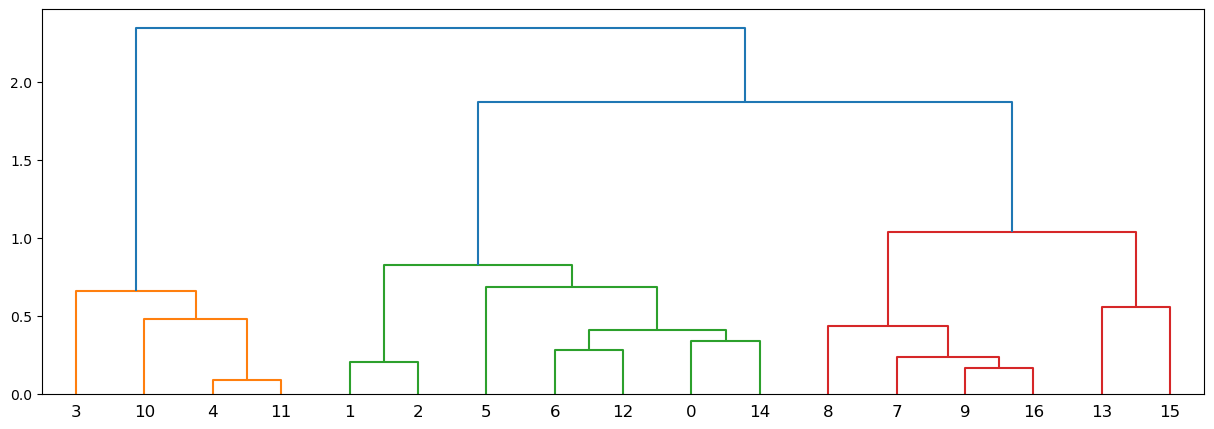

In [68]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'centroid'))
# Центроидная кластеризация / Centroid Clustering

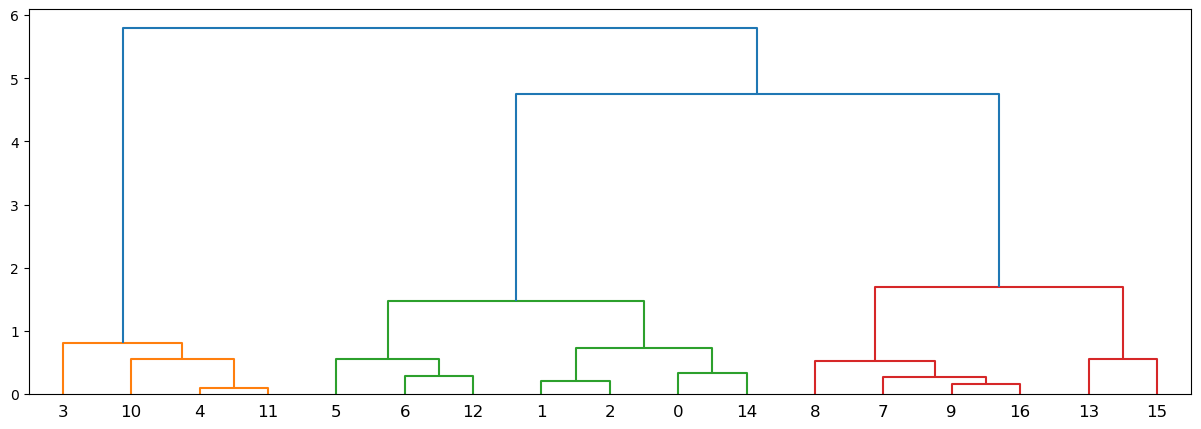

In [69]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'ward'))
# Метод Варда

## Индекс Калински-Харабаша

[Подробнее про calinski_harabasz_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html)

In [70]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(df1[['z_calories', 'z_costs']], method='ward', metric='euclidean') 
labels = fcluster(Z, t=3, criterion='maxclust')  # параметр t определяет число кластеров
calinski_harabasz_score(df1[['z_calories', 'z_costs']], labels)

50.32657953724121

In [71]:
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(df1[['z_calories', 'z_costs']], labels)))

Число кластеров: 2, индекс 16.64498460748926
Число кластеров: 3, индекс 50.32657953724121
Число кластеров: 4, индекс 51.80382074566064
Число кластеров: 5, индекс 67.0535707144872
Число кластеров: 6, индекс 65.19050945075712
Число кластеров: 7, индекс 66.63167402114675
Число кластеров: 8, индекс 64.58809025811043
Число кластеров: 9, индекс 66.99883144398997


In [72]:
labels = fcluster(Z, t=5, criterion='maxclust')  # проводим рассчёты для 5-ти кластеров
labels

array([3, 3, 3, 1, 1, 2, 2, 4, 4, 4, 1, 1, 2, 5, 3, 5, 4], dtype=int32)

## Добавление переменной "принадлежность к кластеру"

In [73]:
df1['culster_labels'] = labels  # создаём новую переменную, отражающую принадлежность наблюдения к кластеру
df1

,bier,producer,costs,calories,alcohol,z_calories,z_costs,culster_labels
0,Budweiser,USA,0.43,144,4.7,0.400407,-0.468980,3
1,Lowenbrau,USA,0.48,157,4.9,0.804471,-0.128268,3
2,Michelob,USA,0.50,162,5.0,0.959880,0.008017,3
3,Kronenbourg,France,0.73,170,5.2,1.208535,1.575291,1
4,Heineken,Holland,0.77,152,5.0,0.649062,1.847861,1
5,Schmidts,USA,0.30,147,4.7,0.493653,-1.354830,2
6,Pabst Blue Ribbon,USA,0.38,152,4.9,0.649062,-0.809692,2
7,Miller Light,USA,0.43,99,4.3,-0.998275,-0.468980,4
8,Budweiser Light,USA,0.44,113,3.7,-0.563130,-0.400837,4
9,Coors Light,USA,0.46,102,4.1,-0.905030,-0.264553,4


## Описательные статистики по кластерам

In [74]:
df1.groupby('culster_labels')[['costs', 'calories']].mean()

,costs,calories
culster_labels,,
1,0.740000,154.250000
2,0.346667,147.666667
3,0.460000,154.500000
4,0.450000,102.750000
5,0.420000,70.000000


In [75]:
df1[['costs', 'calories']].mean()

costs         0.498824
calories    131.117647
dtype: float64

In [76]:
df1['culster_labels'].value_counts()

culster_labels
3    4
1    4
4    4
2    3
5    2
Name: count, dtype: int64

In [77]:
# Добавить сюда описание кластеров
Кластер 1: 4 бренда, очень высокая калорийность и самые высокие расходы (Премиальные бренды)
Кластер 2: самые низкие расходы и калорийность выше среднего по выборке
Кластер 5: низкие расходы и самая низкая калорийность (Серия лайт)

### Пример 1.2. Оценка кандидатов <a id="section_1_2"></a>

Описание переменных:
- nr  - Identification of the candidate
- name - Name of the candidate 
- t1 - Memory for numbers
- t2 - Mathematical skills
- t3 - Readiness for direct dialogues
- t4 - Ability to prepare algorithms
- t5 - Speech confidence
- t6 - Team Spirit
- t7 - Resourcefulness
- t8 - Cooperation
- t9 - Recognition by others
- t10 - Ability to persuade

In [78]:
df2 = pd.read_excel('assess.xlsx', index_col=0)
df2

,name,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
nr,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9
2,Sigrid K,10,10,4,10,5,5,4,5,4,3
3,Elmar M,5,4,10,5,10,4,10,5,3,10
4,Peter B,10,10,9,10,10,10,9,10,10,9
5,Otto R,4,3,5,4,3,10,4,10,10,5
6,Elke M,10,10,4,10,5,4,3,4,5,5
7,Sarah K,4,4,5,5,4,10,5,10,10,6
8,Peter T,4,5,3,4,5,10,4,10,10,4
9,Gudrun M,4,5,10,4,10,5,10,4,3,10


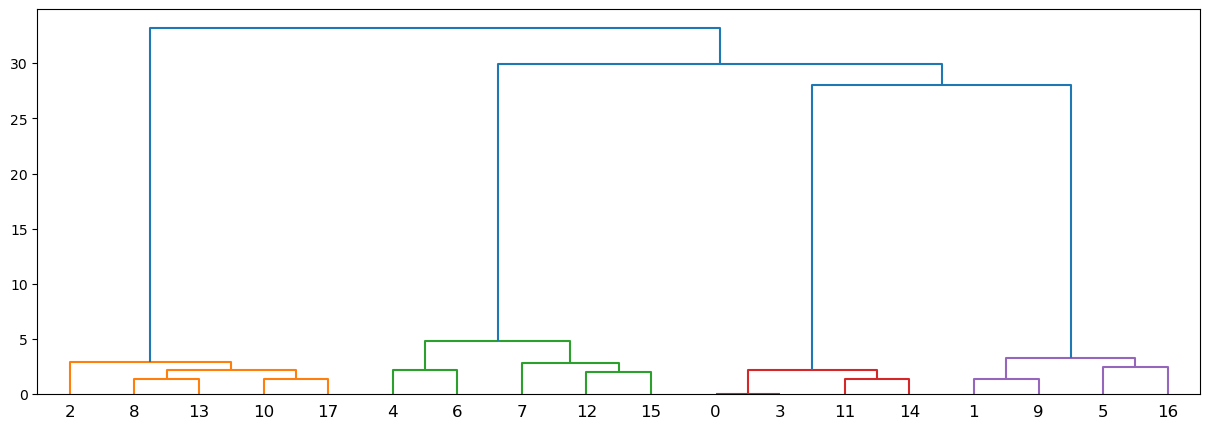

In [79]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], 'ward'))
#Метод Варда

In [80]:
Z = linkage(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], method='ward', metric='euclidean') 
for k in range (2, 15):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], labels)))

Число кластеров: 2, индекс 10.014207154732421
Число кластеров: 3, индекс 17.269744416302096
Число кластеров: 4, индекс 155.46624136097822
Число кластеров: 5, индекс 150.59763476347635
Число кластеров: 6, индекс 136.40645161290323
Число кластеров: 7, индекс 126.44037940379404
Число кластеров: 8, индекс 122.75613275613274
Число кластеров: 9, индекс 118.40277777777777
Число кластеров: 10, индекс 115.01683501683502
Число кластеров: 11, индекс 115.01683501683502
Число кластеров: 12, индекс 129.84848484848484
Число кластеров: 13, индекс 148.99305555555554
Число кластеров: 14, индекс 148.99305555555554


In [81]:
labels = fcluster(Z, t=4, criterion='maxclust')  # оставляем 4 кластера
df2['culster_labels'] = labels
df2

,name,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,culster_labels
nr,,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9,3
2,Sigrid K,10,10,4,10,5,5,4,5,4,3,4
3,Elmar M,5,4,10,5,10,4,10,5,3,10,1
4,Peter B,10,10,9,10,10,10,9,10,10,9,3
5,Otto R,4,3,5,4,3,10,4,10,10,5,2
6,Elke M,10,10,4,10,5,4,3,4,5,5,4
7,Sarah K,4,4,5,5,4,10,5,10,10,6,2
8,Peter T,4,5,3,4,5,10,4,10,10,4,2
9,Gudrun M,4,5,10,4,10,5,10,4,3,10,1


In [82]:
df2['culster_labels'].value_counts()

culster_labels
1    5
2    5
3    4
4    4
Name: count, dtype: int64

In [83]:
df2.columns

Index(['name', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10',
       'culster_labels'],
      dtype='object')

In [84]:
df2.columns = ['Name', 'Memory for numbers', 'Mathematical skills', 'Readiness for direct dialogues', 
              'Ability to prepare algorithms', 'Speech confidence', 'Team Spirit', 'Resourcefulness',
              'Cooperation', 'Recognition by others', 'Ability to persuade', 'Clusters']
df2

,Name,Memory for numbers,Mathematical skills,Readiness for direct dialogues,Ability to prepare algorithms,Speech confidence,Team Spirit,Resourcefulness,Cooperation,Recognition by others,Ability to persuade,Clusters
nr,,,,,,,,,,,,
1,Volker R,10,10,9,10,10,10,9,10,10,9,3
2,Sigrid K,10,10,4,10,5,5,4,5,4,3,4
3,Elmar M,5,4,10,5,10,4,10,5,3,10,1
4,Peter B,10,10,9,10,10,10,9,10,10,9,3
5,Otto R,4,3,5,4,3,10,4,10,10,5,2
6,Elke M,10,10,4,10,5,4,3,4,5,5,4
7,Sarah K,4,4,5,5,4,10,5,10,10,6,2
8,Peter T,4,5,3,4,5,10,4,10,10,4,2
9,Gudrun M,4,5,10,4,10,5,10,4,3,10,1


In [85]:
df2.groupby('Clusters').mean(numeric_only=True)

,Memory for numbers,Mathematical skills,Readiness for direct dialogues,Ability to prepare algorithms,Speech confidence,Team Spirit,Resourcefulness,Cooperation,Recognition by others,Ability to persuade
Clusters,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


In [86]:
df2.groupby('Clusters').mean(numeric_only=True).T  # транспонируем таблицу

Clusters,1,2,3,4
Memory for numbers,4.2,4.8,10.00,10.00
Mathematical skills,4.8,4.4,10.00,10.00
Readiness for direct dialogues,10.0,4.0,9.00,4.25
Ability to prepare algorithms,4.4,4.0,10.00,10.00
Speech confidence,10.0,4.2,10.00,4.75
Team Spirit,4.4,10.0,9.50,4.50
Resourcefulness,10.0,4.4,9.25,3.75
Cooperation,4.0,10.0,9.75,4.25
Recognition by others,3.8,10.0,10.00,4.25
Ability to persuade,10.0,5.0,9.50,4.25


In [87]:
# Добавить сюда описание кластеров
Кластер 1: Непризнанные перегорщики
Кластер 2: Командные игроки (высокие показатели по сотрудничеству, остальные средние)
Кластер 3: Гении (все показатели высокие)
Кластер 4: Технари

## 2. Кластерный анализ методом k-means <a class="anchor" id="chapter2"></a>

[Подробнее про KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Пример 2.1. Synthetic data <a id="section_2_1"></a>

In [88]:
np.random.seed(123)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

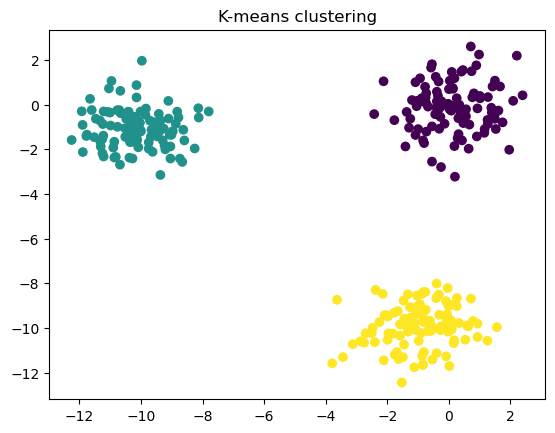

In [89]:
k_means = KMeans(n_clusters = 3)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title('K-means clustering')
plt.show()

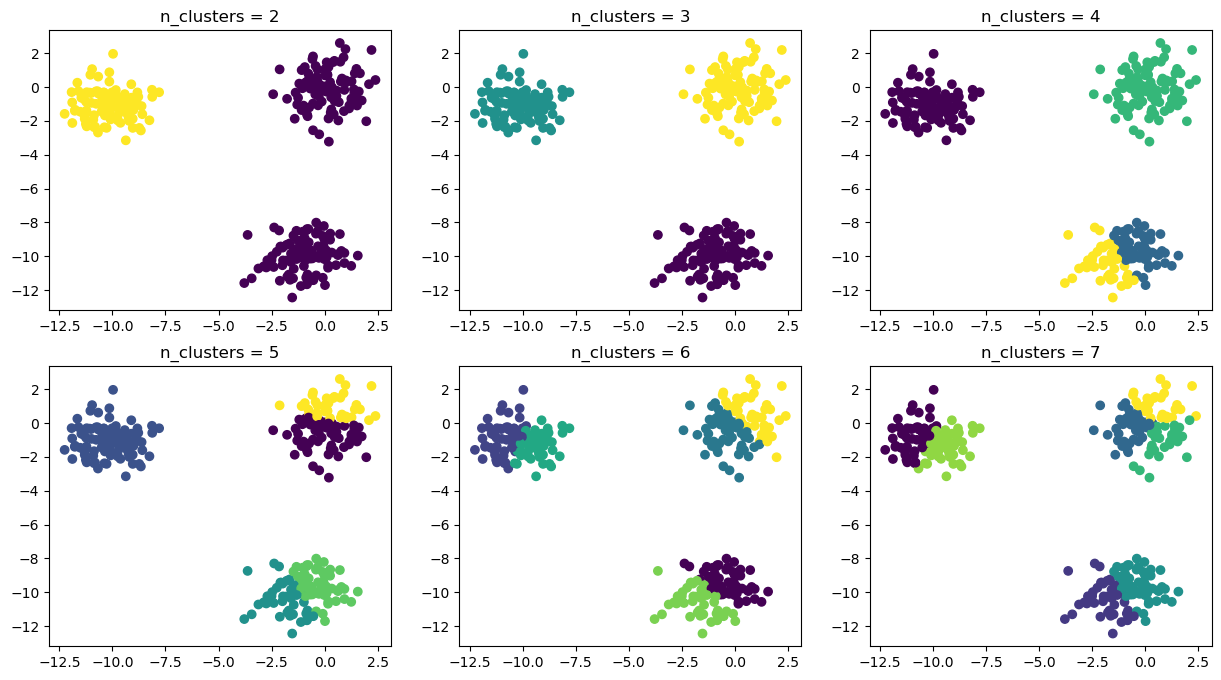

In [90]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title('n_clusters = {}'.format(n_c))

plt.show()

Инерция вычисляется путем измерения расстояния между каждой точкой данных и ее центроидом, возведения этого расстояния в квадрат и суммирования этих квадратов по каждому кластеру. Мы стремимся к получению модели с низкой инерцией. 

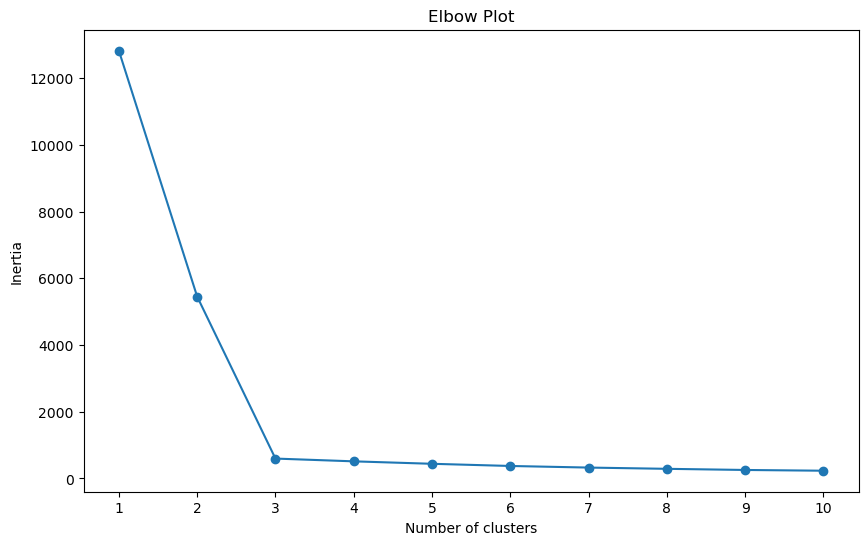

In [91]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

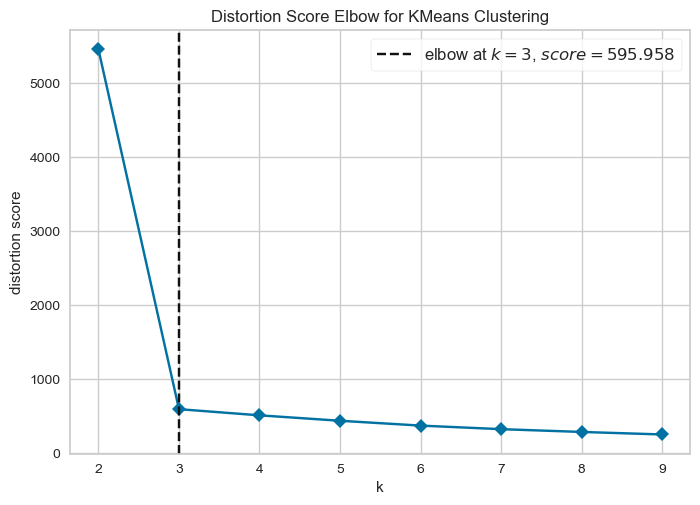

In [92]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X)
visualizer.show()
plt.show()

Искажение (distortion score) — это среднее значение квадрата евклидового  расстояния от центроида до точек соответствующих кластеров. 

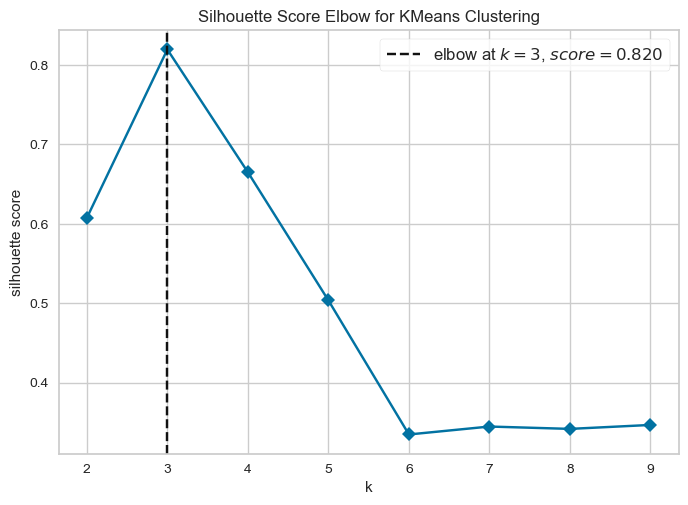

In [93]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(X)
visualizer.show()
plt.show()

Коэффициент силуэта (silhouette score) показывает, насколько каждый объект «похож» на другие объекты в том кластере, в который он был распределен в процессе кластеризации, и «не похож» на объекты из других кластеров.

В основе идеи метода лежит вычисление коэффициентов, которые присваиваются каждому объекту в кластере и образуют так называемый силуэт кластера. Коэффициенты изменяются от -1 до 1. Значения, близкие к 1, указывают на то, что объект является похожим на другие объекты в кластере и не похожим на объекты из других кластеров. Если большинство объектов имеют значения коэффициентов близкими к 1, можно утверждать, что кластерная структура хорошо выражена, и количество кластеров соответствует естественной группировке данных.

Можно вычислить среднее значение силуэта по всем наблюдениям и использовать его как метрику для оценки количества кластеров.

### Пример 2.2. YouTube <a id="section_2_2"></a>

[Описание датасета](https://www.kaggle.com/datasnaek/youtube-new)

In [2]:
df3 = pd.read_excel('youtube.xlsx')
df3

,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,country
0,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,US
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,137843120,3014471,1602383,817582,US
2,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,125432237,2912702,1545015,807558,US
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,113874632,2811215,1470383,787174,US
4,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,102012605,2376636,117196,134224,US
...,...,...,...,...,...,...,...,...,...
3368,mE9oqeXj4WY,DOMO WILSON REACTED TO MY SONG!!! (REACTION VI...,Queen Naija,2018-01-09T23:25:37.000Z,1381198,123524,1029,11970,US
3369,ItL6vcUrpUs,MACKLEMORE FEAT DAVE B & TRAVIS THOMPSON - COR...,Macklemore LLC,2017-12-21T17:00:20.000Z,1381081,70142,1790,3131,US
3370,CWAX-tiepMo,RWBY Volume 5: Chapter 14 - Haven's Fate | Roo...,Rooster Teeth,2018-01-27T16:00:00.000Z,1380940,49981,2818,20286,US
3371,B9nVxg3DqAM,Developer Update | Happy Year of the Dog! | Ov...,PlayOverwatch,2018-02-07T00:55:22.000Z,1380249,42754,1225,9455,US


In [3]:
# стандартизируем значения переменных
df3['z_views'] = (df3['views'] - df3['views'].mean())/df3['views'].std()
df3['z_likes'] = (df3['likes'] - df3['likes'].mean())/df3['likes'].std()
df3['z_dislikes'] = (df3['dislikes'] - df3['dislikes'].mean())/df3['dislikes'].std()
df3['z_comment_count'] = (df3['comment_count'] - df3['comment_count'].mean())/df3['comment_count'].std()
df3

,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,country,z_views,z_likes,z_dislikes,z_comment_count
0,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,US,15.589827,9.347265,17.683401,9.883878
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,137843120,3014471,1602383,817582,US,14.341644,9.093412,17.241942,9.970357
2,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,125432237,2912702,1545015,807558,US,12.998451,8.766698,16.619323,9.844432
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,113874632,2811215,1470383,787174,US,11.747606,8.440888,15.809337,9.588360
4,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,102012605,2376636,117196,134224,US,10.463814,7.045735,1.123107,1.385748
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,mE9oqeXj4WY,DOMO WILSON REACTED TO MY SONG!!! (REACTION VI...,Queen Naija,2018-01-09T23:25:37.000Z,1381198,123524,1029,11970,US,-0.427225,-0.187555,-0.137661,-0.150055
3369,ItL6vcUrpUs,MACKLEMORE FEAT DAVE B & TRAVIS THOMPSON - COR...,Macklemore LLC,2017-12-21T17:00:20.000Z,1381081,70142,1790,3131,US,-0.427237,-0.358931,-0.129402,-0.261094
3370,CWAX-tiepMo,RWBY Volume 5: Chapter 14 - Haven's Fate | Roo...,Rooster Teeth,2018-01-27T16:00:00.000Z,1380940,49981,2818,20286,US,-0.427253,-0.423655,-0.118245,-0.045586
3371,B9nVxg3DqAM,Developer Update | Happy Year of the Dog! | Ov...,PlayOverwatch,2018-02-07T00:55:22.000Z,1380249,42754,1225,9455,US,-0.427328,-0.446856,-0.135534,-0.181649


In [4]:
X = df3[['z_views', 'z_likes', 'z_dislikes', 'z_comment_count']]
X

,z_views,z_likes,z_dislikes,z_comment_count
0,15.589827,9.347265,17.683401,9.883878
1,14.341644,9.093412,17.241942,9.970357
2,12.998451,8.766698,16.619323,9.844432
3,11.747606,8.440888,15.809337,9.588360
4,10.463814,7.045735,1.123107,1.385748
...,...,...,...,...
3368,-0.427225,-0.187555,-0.137661,-0.150055
3369,-0.427237,-0.358931,-0.129402,-0.261094
3370,-0.427253,-0.423655,-0.118245,-0.045586
3371,-0.427328,-0.446856,-0.135534,-0.181649


In [5]:
X.corr()

,z_views,z_likes,z_dislikes,z_comment_count
z_views,1.000000,0.784998,0.545074,0.554437
z_likes,0.784998,1.000000,0.501234,0.706175
z_dislikes,0.545074,0.501234,1.000000,0.865680
z_comment_count,0.554437,0.706175,0.865680,1.000000


In [97]:
for k in range (2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(X, labels)))

Число кластеров: 2, индекс 3327.1760128427354
Число кластеров: 3, индекс 3931.860823842984
Число кластеров: 4, индекс 4268.26494575675
Число кластеров: 5, индекс 3990.874473278836
Число кластеров: 6, индекс 4037.7003451953515
Число кластеров: 7, индекс 4312.98206986972
Число кластеров: 8, индекс 4285.509339816705
Число кластеров: 9, индекс 4367.815939874247
Число кластеров: 10, индекс 4445.803533941093
Число кластеров: 11, индекс 4517.1622015494895
Число кластеров: 12, индекс 4568.411740755337
Число кластеров: 13, индекс 4691.634567516309
Число кластеров: 14, индекс 4787.643972548767


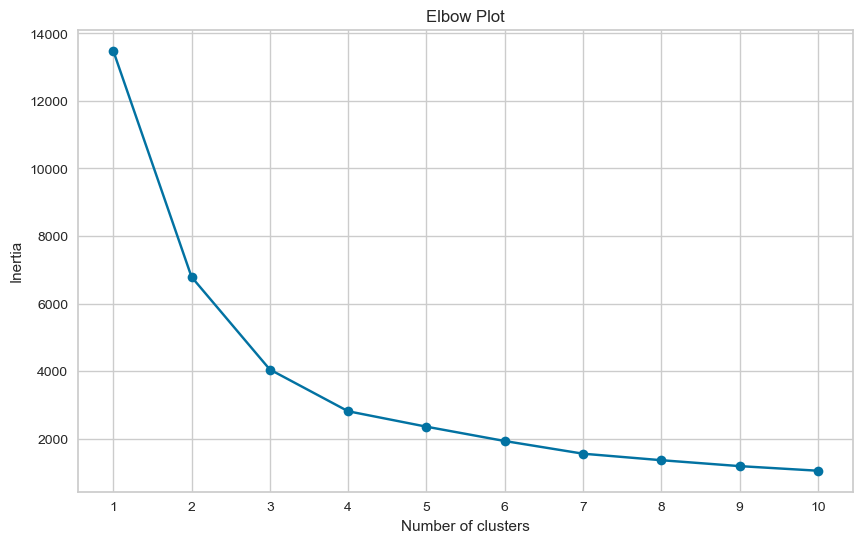

In [98]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

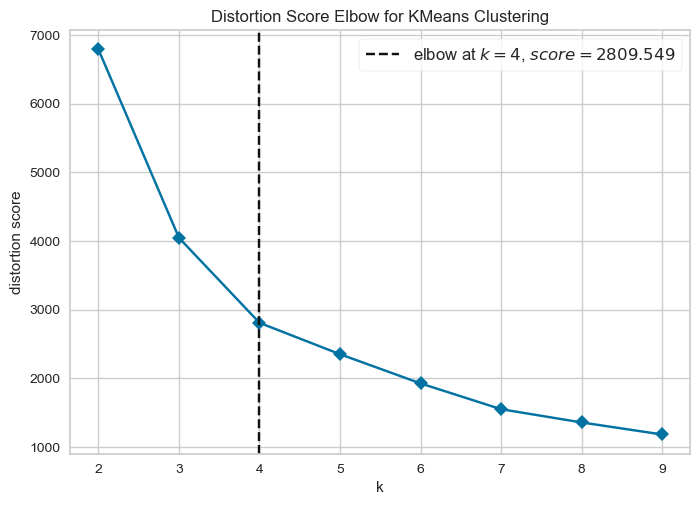

In [99]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X)
visualizer.show()
plt.show()

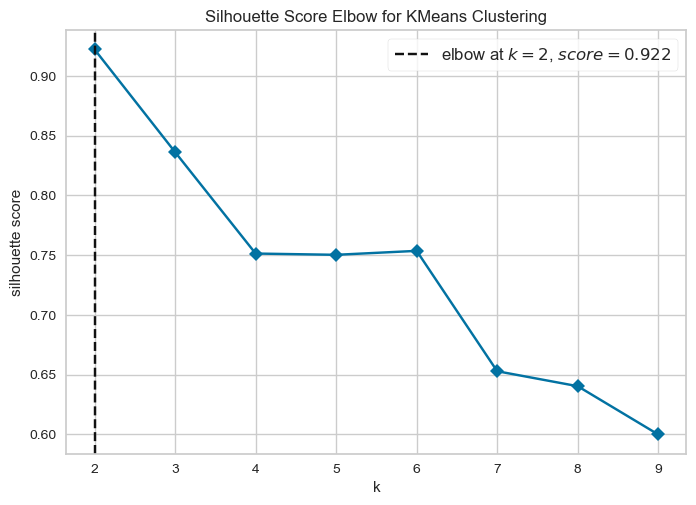

In [100]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(X)
visualizer.show()
plt.show()

In [101]:
kmeans_model = KMeans(n_clusters=4).fit_predict(X)  # оставляем 4 кластера

In [102]:
df3['Clusters'] = kmeans_model
df3.head()

,video_id,title,channel_title,publish_time,views,likes,dislikes,comment_count,country,z_views,z_likes,z_dislikes,z_comment_count,Clusters
0,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,US,15.589827,9.347265,17.683401,9.883878,1
1,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,137843120,3014471,1602383,817582,US,14.341644,9.093412,17.241942,9.970357,1
2,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,125432237,2912702,1545015,807558,US,12.998451,8.766698,16.619323,9.844432,1
3,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,113874632,2811215,1470383,787174,US,11.747606,8.440888,15.809337,9.588360,1
4,TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,102012605,2376636,117196,134224,US,10.463814,7.045735,1.123107,1.385748,3


In [103]:
df3['Clusters'].value_counts()

Clusters
0    3053
2     264
3      43
1      13
Name: count, dtype: int64

In [104]:
df3.groupby('Clusters')[['z_views', 'z_likes', 'z_dislikes', 'z_comment_count']].mean(numeric_only=True)

,z_views,z_likes,z_dislikes,z_comment_count
Clusters,,,,
0,-0.213956,-0.234861,-0.100620,-0.154653
1,7.307315,5.908843,15.037658,12.158660
2,1.412803,1.468792,0.170041,0.535895
3,4.307716,5.871012,1.553765,4.014361


In [105]:
# Добавить сюда описание кластеров

Кластер 1: очень популярные видео с негативным содержанием, на которые активно реагировала аудитория
    
Кластер 3: очень популярные видео как с положит, так и с негатив реакцией, но больше положительной реакции
    

## 3. DBSCAN <a class="anchor" id="chapter3"></a>

<p><a href="https://commons.wikimedia.org/wiki/File:DBSCAN-Illustration.svg#/media/Файл:DBSCAN-Illustration.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1200px-DBSCAN-Illustration.svg.png" alt="DBSCAN-Illustration.svg" width="450" height="450"> </a><br>

### Пример 3.1. Synthetic data <a id="section_3_1"></a>

In [3]:
np.random.seed(123)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

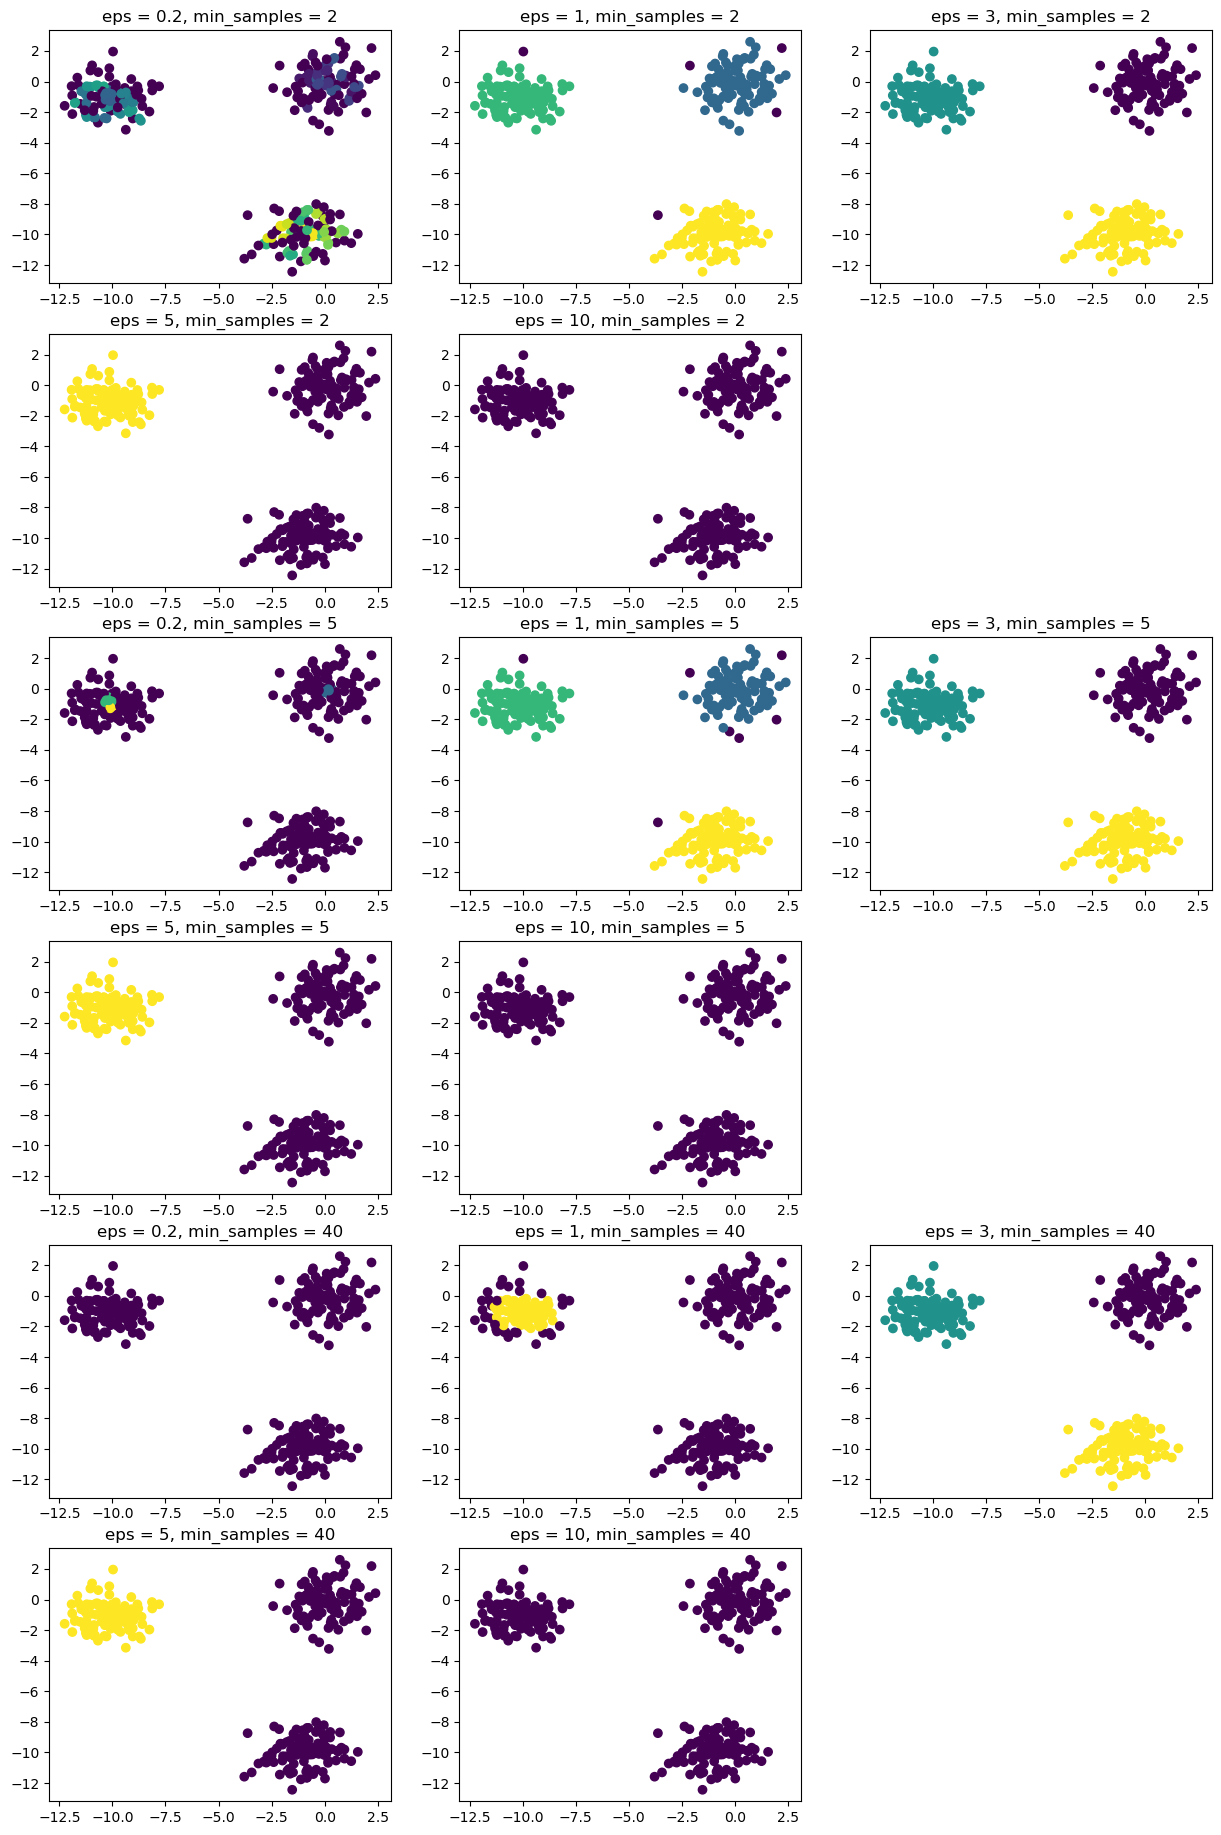

In [4]:
plt.figure(figsize= (15,23))
i = 1
for samples in [2, 5, 40]:
    for e in [0.2, 1, 3, 5, 10]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

### Пример 3.2. Mall Customer Segmentation Data<a id="section_3_2"></a>

[Источник](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [106]:
df4 = pd.read_csv('Mall_Customers.csv', index_col=0)
df4

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [107]:
df4.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [108]:
X_numerics = df4[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

### Иерархический кластерный анализ

In [109]:
from scipy.stats.mstats import zscore  # функция для z-стандартизации

In [110]:
#стандартизируем значения переменных
X_numerics['zAge'] = zscore(X_numerics['Age'])
X_numerics['zIncome'] = zscore(X_numerics['Annual Income (k$)'])
X_numerics['zSpending'] = zscore(X_numerics['Spending Score (1-100)'])
X_numerics_z = X_numerics[['zAge', 'zIncome', 'zSpending']] 

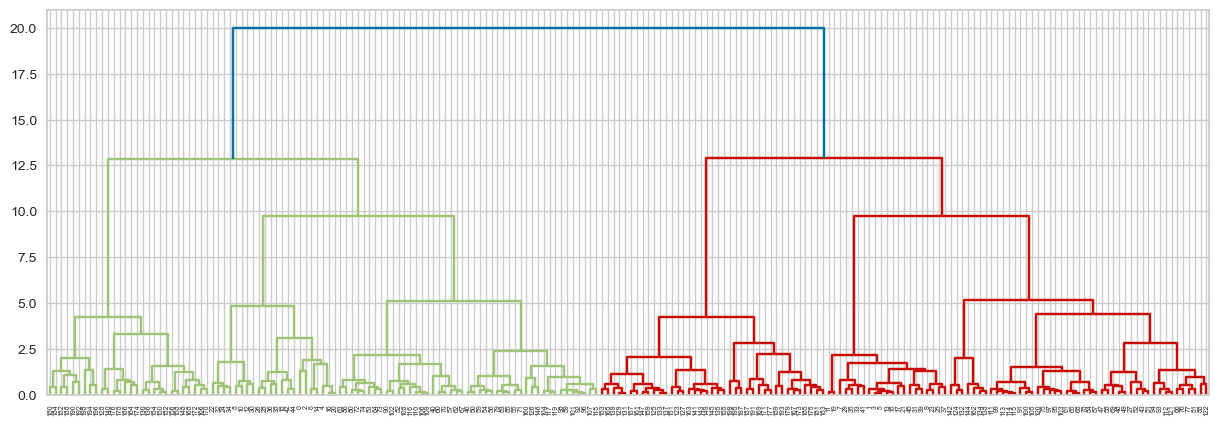

In [111]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(X_numerics_z, 'ward'))
#Ward's Method

In [112]:
Z = linkage(X_numerics_z, method='ward', metric='euclidean') 
labels = fcluster(Z, t=2, criterion='maxclust') #t определяет число кластеров
calinski_harabasz_score(X_numerics_z, labels)

99.00066801676013

In [113]:
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(X_numerics_z, labels)))

Number of clusters: 2, index 99.00066801676013
Number of clusters: 3, index 88.10174149244529
Number of clusters: 4, index 102.0193992602494
Number of clusters: 5, index 107.82656032570377
Number of clusters: 6, index 127.98645433956887
Number of clusters: 7, index 120.68680526925652
Number of clusters: 8, index 118.06679638909684
Number of clusters: 9, index 117.47512295202333


In [114]:
labels = fcluster(Z, t=6, criterion='maxclust')
labels

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 6, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 3, 5, 2, 6,
       2, 5, 3, 6, 6, 6, 3, 6, 6, 3, 3, 3, 3, 3, 6, 3, 3, 6, 3, 3, 3, 6,
       6, 3, 6, 6, 3, 3, 3, 3, 3, 6, 6, 6, 6, 3, 3, 6, 3, 3, 6, 3, 3, 6,
       6, 3, 3, 6, 3, 6, 6, 6, 3, 6, 3, 6, 6, 3, 3, 6, 3, 6, 3, 3, 3, 3,
       3, 6, 6, 6, 6, 6, 3, 3, 3, 3, 6, 6, 6, 4, 6, 4, 3, 4, 1, 4, 1, 4,
       6, 4, 6, 4, 1, 4, 6, 4, 1, 4, 6, 4, 6, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 3, 4, 6, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [115]:
df4['Cluster_Hierarchical'] = labels  # добавление переменной с информацией о принадлежности к кластеру
df4

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Hierarchical
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,5
3,Female,20,16,6,2
4,Female,23,16,77,5
5,Female,31,17,40,2
...,...,...,...,...,...
196,Female,35,120,79,4
197,Female,45,126,28,1
198,Male,32,126,74,4


### Описательная статистика по кластерам

In [116]:
df4.groupby('Cluster_Hierarchical')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Hierarchical,,,
1,43.892857,91.285714,16.678571
2,44.318182,25.772727,20.272727
3,56.400000,55.288889,48.355556
4,32.692308,86.538462,82.128205
5,24.809524,25.619048,80.238095
6,27.377778,57.511111,45.844444


In [117]:
df4['Cluster_Hierarchical'].value_counts()

Cluster_Hierarchical
6    45
3    45
4    39
1    28
2    22
5    21
Name: count, dtype: int64

## Алгоритм k-means

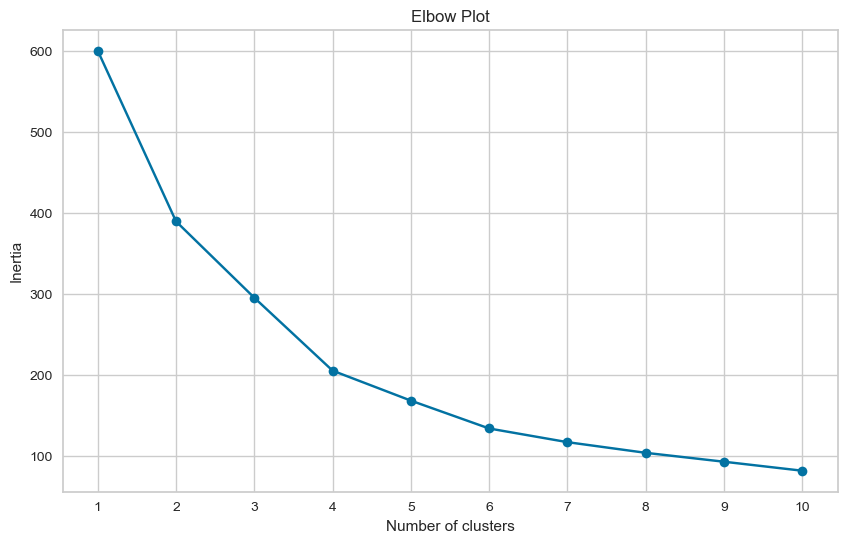

In [118]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_numerics_z)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

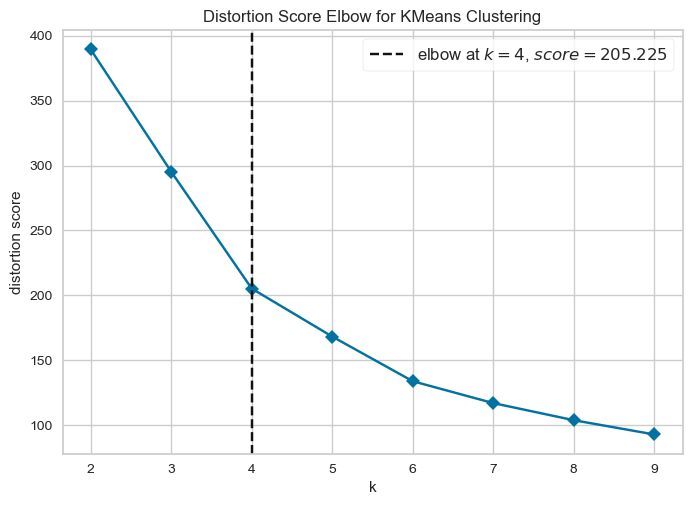

In [119]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X_numerics_z)
visualizer.show()
plt.show()

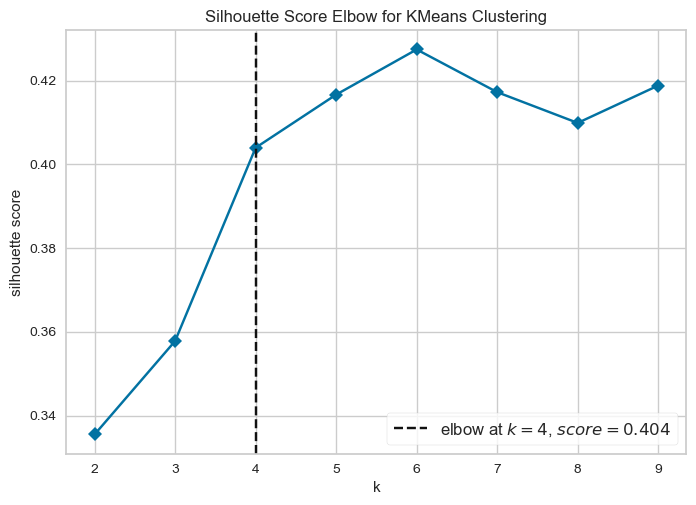

In [120]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(X_numerics_z)
visualizer.show()
plt.show()

In [121]:
kmeans_model = KMeans(n_clusters=4).fit_predict(X_numerics_z)

In [122]:
df4['Clusters_k-means'] = kmeans_model
df4.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Hierarchical,Clusters_k-means
CustomerID,,,,,,
1,Male,19,15,39,2,3
2,Male,21,15,81,5,3
3,Female,20,16,6,2,3
4,Female,23,16,77,5,3
5,Female,31,17,40,2,3


In [123]:
df4['Clusters_k-means'].value_counts()

Clusters_k-means
2    65
3    57
0    40
1    38
Name: count, dtype: int64

In [124]:
df4.groupby('Clusters_k-means')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Clusters_k-means,,,
0,32.875000,86.100000,81.525000
1,39.368421,86.500000,19.578947
2,53.984615,47.707692,39.969231
3,25.438596,40.000000,60.298246


## DBSCAN

In [125]:
from itertools import product

eps_values = np.arange(8,12.75,0.25)  # рассматриваемые значения радиуса окрестности
min_samples = np.arange(3,10)  # рассматриваемые значение минимального числа соседей

DBSCAN_params = list(product(eps_values, min_samples))

In [126]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

Тепловая карта ниже показывает, сколько кластеров было создано алгоритмом DBSCAN для соответствующих комбинаций параметров.

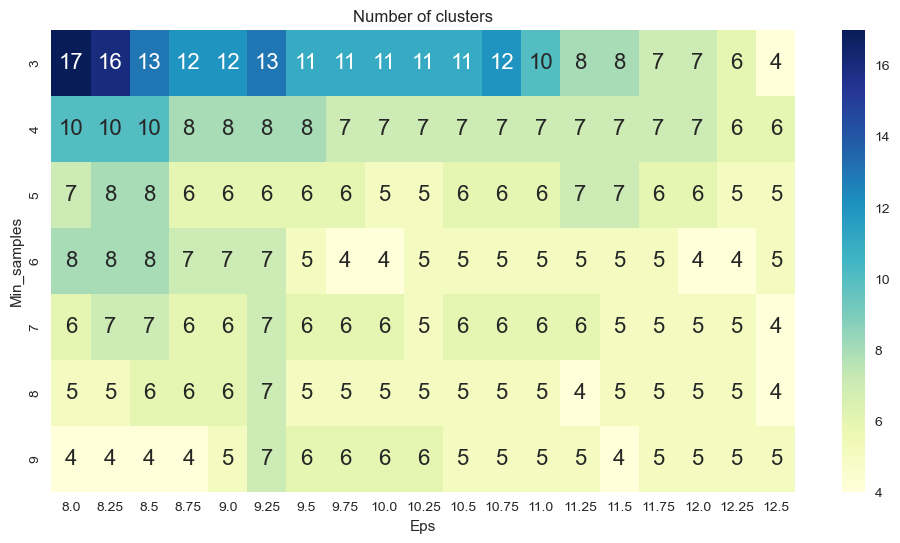

In [127]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

Количество кластеров варьируется от 4 до 17. Однако большинство комбинаций дает 4-7 кластеров. Чтобы решить, какую комбинацию выбрать, мы будем использовать коэффициент силуэта и снова изобразим его значения на тепловой карте.

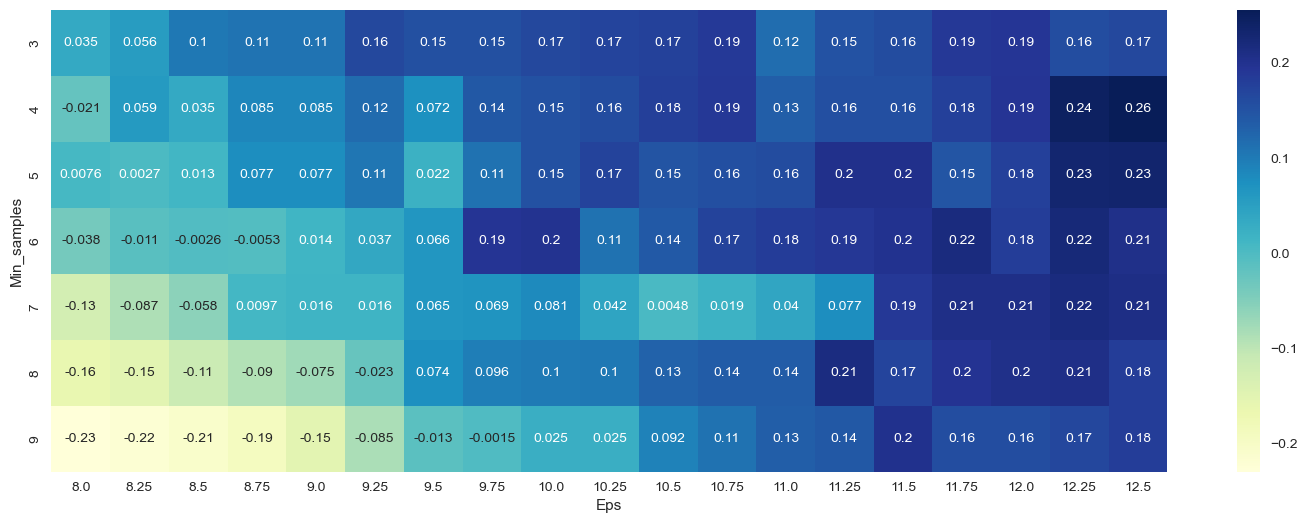

In [128]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Максимум составляет 0,26 для eps=12,5 и min_samples=4.

In [129]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [130]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


DBSCAN создал 5 кластеров плюс кластер выбросов (-1). Размеры кластеров 0-4 значительно различаются - некоторые имеют только 4 или 8 наблюдений. Всего 18 выбросов.

In [131]:
df4['Cluster_DBSCAN'] = DBS_clustering.labels_
df4

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Hierarchical,Clusters_k-means,Cluster_DBSCAN
CustomerID,,,,,,,
1,Male,19,15,39,2,3,0
2,Male,21,15,81,5,3,0
3,Female,20,16,6,2,3,-1
4,Female,23,16,77,5,3,0
5,Female,31,17,40,2,3,0
...,...,...,...,...,...,...,...
196,Female,35,120,79,4,0,-1
197,Female,45,126,28,1,1,-1
198,Male,32,126,74,4,0,-1


In [132]:
df4['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
 0    112
 2     34
 3     24
-1     18
 1      8
 4      4
Name: count, dtype: int64

In [133]:
df4.groupby('Cluster_DBSCAN')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_DBSCAN,,,
-1,36.944444,74.000,44.944444
0,39.142857,48.250,52.339286
1,53.250000,27.750,9.500000
2,32.882353,82.000,83.235294
3,45.583333,85.875,17.958333
4,20.750000,76.250,8.000000
